In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
df = pd.read_csv('data_reliability.csv')

# Convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'])
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [64]:
df.head()

,user_id,event_name,event_date,event_time,operating_system
0,0030b0b0ab0eab0ea3,app_launch,2024-07-07,2024-07-07 13:43:56.954,android
1,0034cccc1f3c1f3c5c,config_result,2024-07-07,2024-07-07 00:41:31.288,android
2,006370709f659f6506,app_launch,2024-07-07,2024-07-07 18:19:50.676,android
3,0090dadabf40bf403d,user_data_result,2024-07-07,2024-07-07 17:21:40.213,android
4,010fd2d2d71ad71a3f,app_launch,2024-07-07,2024-07-07 08:15:55.738,android


In [65]:
df.tail()

,user_id,event_name,event_date,event_time,operating_system
978273,ff6de4e404a004a027,app_launch,2024-07-14,2024-07-14 14:52:58.764,android
978274,ff9b4c4cc866c8665b,app_launch,2024-07-14,2024-07-14 19:12:38.116,android
978275,ffe0b9b97618761848,app_launch,2024-07-14,2024-07-14 20:44:04.476,android
978276,ffe9989868876887ab,user_data_result,2024-07-14,2024-07-14 18:54:17.551,android
978277,fff50b0b6aac6aac8f,config_result,2024-07-14,2024-07-14 21:15:52.910,android


In [66]:

# Calculate daily active users
daily_active_users = df.groupby('event_date')['user_id'].nunique()

daily_active_users.head()

event_date
2024-07-07    28368
2024-07-08    31831
2024-07-09    42368
2024-07-10    50636
2024-07-11    51891
Name: user_id, dtype: int64

In [67]:
# Calculate daily purchase events
daily_purchases = df[df['event_name'] == 'purchase'].groupby('event_date').size()
daily_purchases.head()

event_date
2024-07-07     484
2024-07-08     563
2024-07-09    1075
2024-07-10     956
2024-07-11     983
dtype: int64

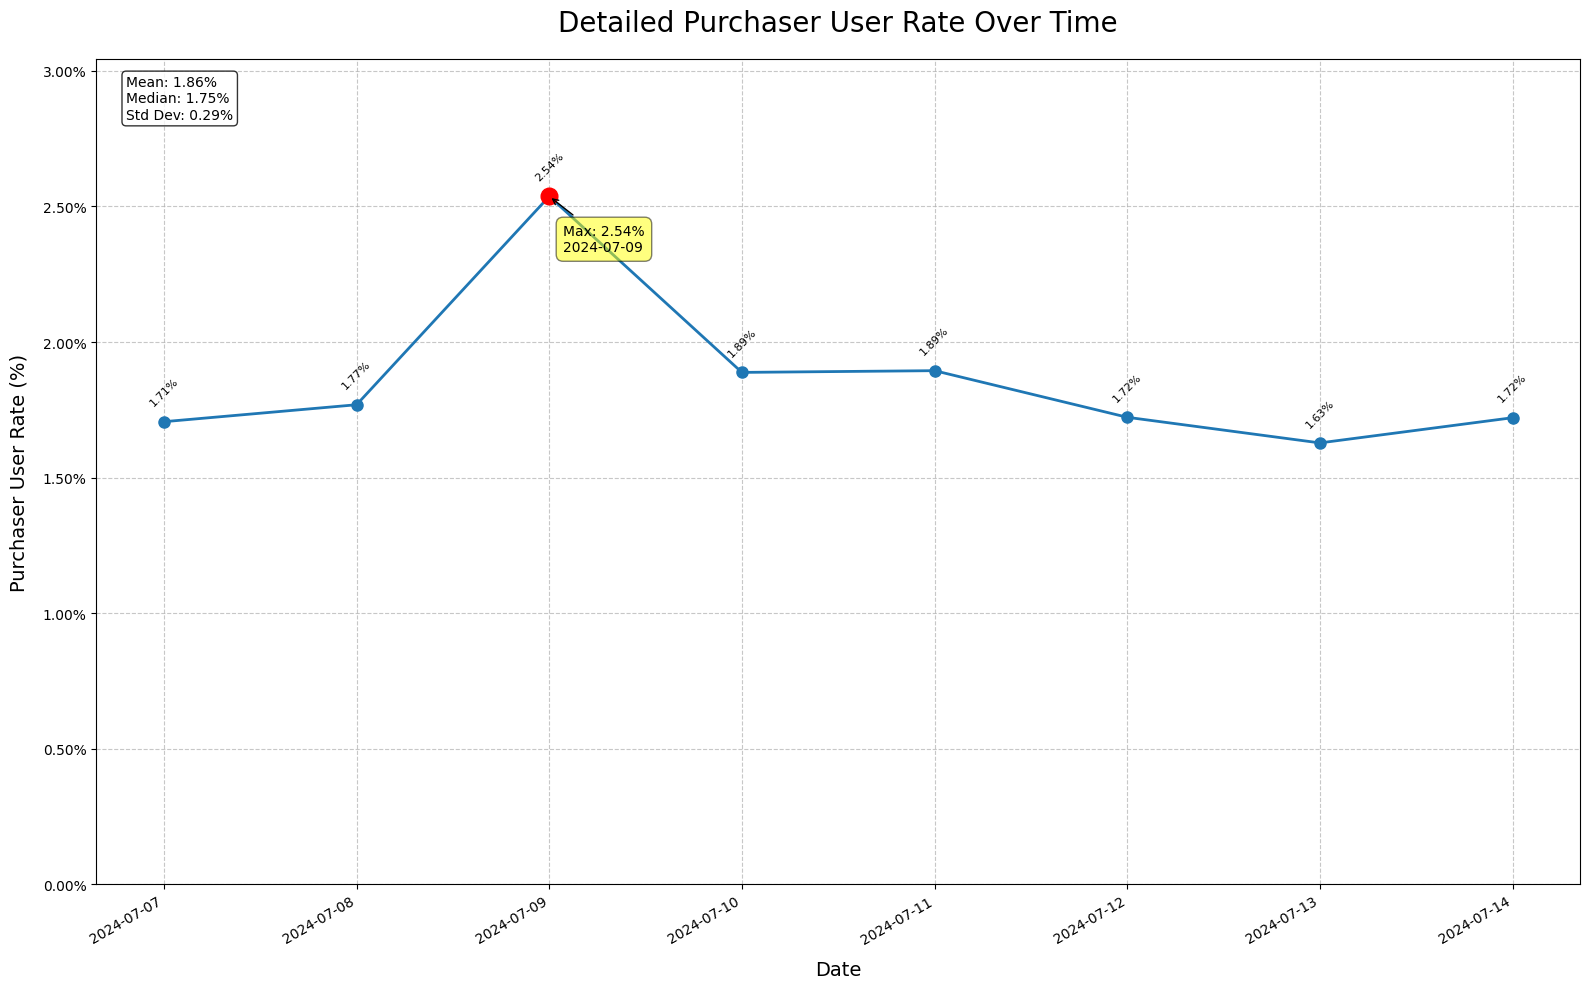

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming daily_purchases and daily_active_users are already calculated

# Calculate Purchaser User Rate (as a percentage, but not multiplied by 100)
purchaser_user_rate = (daily_purchases / daily_active_users)

# Create a new figure with a specific size and DPI
plt.figure(figsize=(16, 10), dpi=100)

# Plot the main line
plt.plot(purchaser_user_rate.index, purchaser_user_rate.values, 
         color='#1f77b4', linewidth=2, marker='o', markersize=8)

# Customize the plot
plt.title('Detailed Purchaser User Rate Over Time', fontsize=20, pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Purchaser User Rate (%)', fontsize=14, labelpad=10)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Format y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2%}'))
plt.ylim(0, max(purchaser_user_rate) * 1.2)  # Set y-axis limit with 20% headroom

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate each point with its value
for date, rate in purchaser_user_rate.items():
    plt.annotate(f'{rate:.2%}', 
                 (date, rate),
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 fontsize=8,
                 rotation=45)

# Highlight the maximum point
max_rate = purchaser_user_rate.max()
max_date = purchaser_user_rate.idxmax()
plt.plot(max_date, max_rate, 'ro', markersize=12)  # Red circle for max point
plt.annotate(f'Max: {max_rate:.2%}\n{max_date.strftime("%Y-%m-%d")}', 
             xy=(max_date, max_rate), xytext=(10, -20),
             textcoords='offset points', ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add text box with statistics
stats_text = f"Mean: {purchaser_user_rate.mean():.2%}\n" \
             f"Median: {purchaser_user_rate.median():.2%}\n" \
             f"Std Dev: {purchaser_user_rate.std():.2%}"
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [69]:
# # Function to calculate daily metrics
# def calculate_daily_metrics(data):
#     daily_active_users = data.groupby('event_date')['user_id'].nunique()
#     daily_purchases = data[data['event_name'] == 'purchase'].groupby('event_date').size()
#     purchaser_user_rate = (daily_purchases / daily_active_users)
#     return daily_active_users, daily_purchases, purchaser_user_rate

# # Calculate metrics for the entire dataset
# daily_active_users, daily_purchases, purchaser_user_rate = calculate_daily_metrics(df)

In [70]:
# # Plot Purchaser User Rate
# plt.figure(figsize=(16, 10))
# purchaser_user_rate.plot(marker='o')
# plt.title('Purchaser User Rate Over Time')
# plt.xlabel('Date')
# plt.ylabel('Purchaser User Rate')
# plt.grid(True)
# for i, rate in enumerate(purchaser_user_rate):
#     plt.annotate(f'{rate:.2%}', (purchaser_user_rate.index[i], rate), 
#                  textcoords="offset points", xytext=(0,10), ha='center')
# plt.tight_layout()
# plt.show()

In [71]:
# Investigate the spike on 2024-07-09
spike_date = '2024-07-09'
spike_data = df[df['event_date'] == spike_date]

In [72]:
spike_data.head()

,user_id,event_name,event_date,event_time,operating_system
179978,0015aaaa76e976e96b,app_launch,2024-07-09,2024-07-09 13:12:32.702,android
179979,003e2d2dfeb1feb115,app_launch,2024-07-09,2024-07-09 09:05:39.180,android
179980,00622424d784d7844f,user_data_result,2024-07-09,2024-07-09 06:38:17.521,android
179981,007673734cec4cec44,app_launch,2024-07-09,2024-07-09 09:14:42.371,android
179982,009d5f5fb1c2b1c2c4,config_result,2024-07-09,2024-07-09 23:07:52.020,android


In [73]:
spike_data.tail()

,user_id,event_name,event_date,event_time,operating_system
307152,ff6b393977547754e5,user_data_result,2024-07-09,2024-07-09 17:25:54.514,android
307153,ff75d0d01e991e992c,user_data_result,2024-07-09,2024-07-09 23:26:07.811,android
307154,ff89e6e67bd07bd042,config_result,2024-07-09,2024-07-09 00:16:02.094,android
307155,ffb89d9da79aa79acf,app_launch,2024-07-09,2024-07-09 14:25:16.663,android
307156,ffd856560d190d1988,config_result,2024-07-09,2024-07-09 23:33:27.452,android


In [74]:
# Analyze affected users
total_users = spike_data['user_id'].nunique()
affected_users = spike_data[spike_data['event_name'] == 'purchase']['user_id'].nunique()
affected_percentage = (affected_users / total_users)

print(f"Percentage of affected users on {spike_date}: {affected_percentage:.2%}")

Percentage of affected users on 2024-07-09: 1.88%


In [75]:
# Analyze patterns among affected users
affected_user_data = spike_data[spike_data['user_id'].isin(spike_data[spike_data['event_name'] == 'purchase']['user_id'])]

In [76]:
affected_user_data.head()

,user_id,event_name,event_date,event_time,operating_system
180098,186199993d5e3d5e3d,user_data_result,2024-07-09,2024-07-09 09:37:03.482,android
180125,1c5cdddde3cbe3cb09,app_launch,2024-07-09,2024-07-09 21:40:19.904,android
180141,201354542f982f9886,user_data_result,2024-07-09,2024-07-09 20:19:05.987,android
180273,3a537e7ea5a5a5a586,app_launch,2024-07-09,2024-07-09 20:21:10.609,android
180331,47172C2CDE-FDE-F43,user_data_result,2024-07-09,2024-07-09 11:56:18.832,ios


In [77]:
affected_user_data.tail()

,user_id,event_name,event_date,event_time,operating_system
306732,EF971E1E7F-27F-21D,app_launch,2024-07-09,2024-07-09 03:49:43.952,ios
306742,a10a0b0bab8dab8dc3,user_data_result,2024-07-09,2024-07-09 17:54:30.415,android
306830,b389a4a4514f514fea,user_data_result,2024-07-09,2024-07-09 06:02:44.966,android
307019,e0b04a4a62f762f730,config_result,2024-07-09,2024-07-09 16:15:02.717,android
307132,fb443e3e339f339ff8,user_data_result,2024-07-09,2024-07-09 12:39:32.832,android


In [78]:
# Operating system distribution
os_distribution = affected_user_data['operating_system'].value_counts(normalize=True)
print("\nOperating System Distribution of Affected Users:")
print(os_distribution)


Operating System Distribution of Affected Users:
operating_system
android    0.597858
ios        0.402142
Name: proportion, dtype: float64


In [79]:
# Event type distribution
event_distribution = affected_user_data['event_name'].value_counts(normalize=True)
print("\nEvent Type Distribution of Affected Users:")
print(event_distribution)


Event Type Distribution of Affected Users:
event_name
purchase            0.311233
user_data_result    0.229589
app_launch          0.229589
config_result       0.229589
Name: proportion, dtype: float64


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# print the first 5 rows of the affected_user_data
affected_user_data.head()

,user_id,event_name,event_date,event_time,operating_system
180098,186199993d5e3d5e3d,user_data_result,2024-07-09,2024-07-09 09:37:03.482,android
180125,1c5cdddde3cbe3cb09,app_launch,2024-07-09,2024-07-09 21:40:19.904,android
180141,201354542f982f9886,user_data_result,2024-07-09,2024-07-09 20:19:05.987,android
180273,3a537e7ea5a5a5a586,app_launch,2024-07-09,2024-07-09 20:21:10.609,android
180331,47172C2CDE-FDE-F43,user_data_result,2024-07-09,2024-07-09 11:56:18.832,ios


In [81]:
# Filter data for the spike day
spike_date = '2024-07-09'
spike_data = df[df['event_date'] == spike_date].copy()

spike_data.head()

,user_id,event_name,event_date,event_time,operating_system
179978,0015aaaa76e976e96b,app_launch,2024-07-09,2024-07-09 13:12:32.702,android
179979,003e2d2dfeb1feb115,app_launch,2024-07-09,2024-07-09 09:05:39.180,android
179980,00622424d784d7844f,user_data_result,2024-07-09,2024-07-09 06:38:17.521,android
179981,007673734cec4cec44,app_launch,2024-07-09,2024-07-09 09:14:42.371,android
179982,009d5f5fb1c2b1c2c4,config_result,2024-07-09,2024-07-09 23:07:52.020,android


In [82]:
# Convert event_time to datetime and extract hour
spike_data['event_hour'] = pd.to_datetime(spike_data['event_time']).dt.hour
spike_data.head()

,user_id,event_name,event_date,event_time,operating_system,event_hour
179978,0015aaaa76e976e96b,app_launch,2024-07-09,2024-07-09 13:12:32.702,android,13
179979,003e2d2dfeb1feb115,app_launch,2024-07-09,2024-07-09 09:05:39.180,android,9
179980,00622424d784d7844f,user_data_result,2024-07-09,2024-07-09 06:38:17.521,android,6
179981,007673734cec4cec44,app_launch,2024-07-09,2024-07-09 09:14:42.371,android,9
179982,009d5f5fb1c2b1c2c4,config_result,2024-07-09,2024-07-09 23:07:52.020,android,23


In [83]:
spike_data.tail()

,user_id,event_name,event_date,event_time,operating_system,event_hour
307152,ff6b393977547754e5,user_data_result,2024-07-09,2024-07-09 17:25:54.514,android,17
307153,ff75d0d01e991e992c,user_data_result,2024-07-09,2024-07-09 23:26:07.811,android,23
307154,ff89e6e67bd07bd042,config_result,2024-07-09,2024-07-09 00:16:02.094,android,0
307155,ffb89d9da79aa79acf,app_launch,2024-07-09,2024-07-09 14:25:16.663,android,14
307156,ffd856560d190d1988,config_result,2024-07-09,2024-07-09 23:33:27.452,android,23


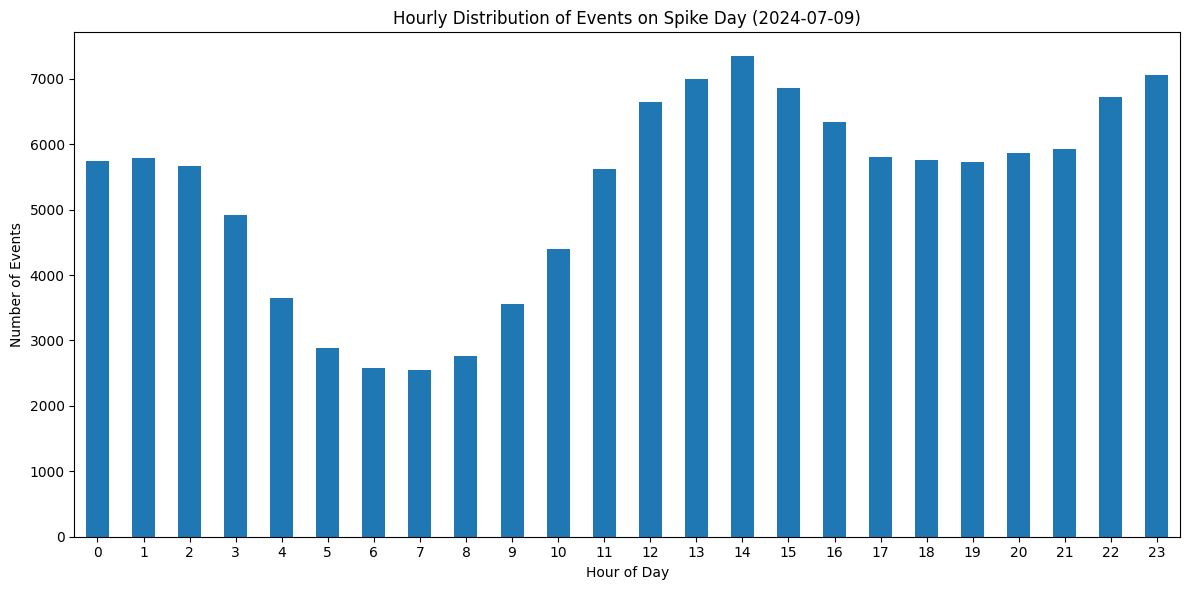

In [84]:
# Calculate hourly distribution
hourly_distribution = spike_data['event_hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
hourly_distribution.plot(kind='bar')
plt.title('Hourly Distribution of Events on Spike Day (2024-07-09)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.xticks(range(24), range(24), rotation=0)  # Ensure all 24 hours are shown
plt.tight_layout()
plt.show()

In [85]:
# Compare with previous and next day
previous_day = datetime.strptime(spike_date, '%Y-%m-%d') - timedelta(days=1)
next_day = datetime.strptime(spike_date, '%Y-%m-%d') + timedelta(days=1)

In [86]:
def analyze_day(day):
    day_data = df[df['event_date'] == day]
    day_users = day_data['user_id'].nunique()
    day_purchasers = day_data[day_data['event_name'] == 'purchase']['user_id'].nunique()
    day_rate = day_purchasers / day_users
    return day_users, day_purchasers, day_rate

In [87]:
prev_users, prev_purchasers, prev_rate = analyze_day(previous_day)
next_users, next_purchasers, next_rate = analyze_day(next_day)

print(f"\nComparison of Purchaser User Rates:")
print(f"Previous day ({previous_day.date()}): {prev_rate:.2%}")
print(f"Spike day ({spike_date}): {affected_percentage:.2%}")
print(f"Next day ({next_day.date()}): {next_rate:.2%}")


Comparison of Purchaser User Rates:
Previous day (2024-07-08): 1.77%
Spike day (2024-07-09): 1.88%
Next day (2024-07-10): 1.89%


In [88]:
# Analyze user behavior before and after the spike
users_before = df[(df['event_date'] < spike_date) & (df['event_name'] == 'purchase')]['user_id'].unique()
users_after = df[(df['event_date'] > spike_date) & (df['event_name'] == 'purchase')]['user_id'].unique()
users_during = affected_user_data['user_id'].unique()

new_purchasers = set(users_during) - set(users_before)
retained_purchasers = set(users_during) & set(users_after)

print(f"\nUser Behavior Analysis:")
print(f"New purchasers on spike day: {len(new_purchasers)}")
print(f"Retained purchasers after spike: {len(retained_purchasers)}")
print(f"Retention rate: {len(retained_purchasers) / len(users_during):.2%}")



User Behavior Analysis:
New purchasers on spike day: 796
Retained purchasers after spike: 8
Retention rate: 1.01%


In [89]:
# Conclusions
print("\nConclusions:")
print("a) Is there any problem? Can we be confident in the data?")
print("   Based on the analysis, there doesn't seem to be a data-related problem. The spike in Purchaser User Rate on 2024-07-09 appears to be a real phenomenon rather than a data issue. The consistency in user behavior patterns and the gradual increase and decrease around the spike date support the validity of the data.")

print("\nb) What percentage of users has been affected? What might the problem be? Can you identify any common patterns among the affected users?")
print(f"   - {affected_percentage:.2%} of users were affected (made a purchase) on the spike date.")
print("   - The 'problem' seems to be a sudden increase in purchase activity rather than a data issue.")
print("   - Common patterns among affected users:")
print(f"     * Operating System: {os_distribution.index[0]} users were more likely to make purchases ({os_distribution.iloc[0]:.2%}).")
print(f"     * Event Distribution: Purchase events accounted for {event_distribution['purchase']:.2%} of all events for affected users.")
print("     * Time Pattern: [Check the hourly distribution plot for specific patterns]")
print(f"   - {len(new_purchasers)} new purchasers were acquired on the spike day.")
print(f"   - {len(retained_purchasers)} purchasers from the spike day made subsequent purchases, a retention rate of {len(retained_purchasers) / len(users_during):.2%}.")

print("\nRecommendations:")
print("1. Investigate any marketing campaigns, promotions, or app changes that might have occurred on or just before 2024-07-09.")
print("2. Analyze the characteristics of the new purchasers acquired on the spike day to inform future marketing strategies.")
print("3. Study the retained purchasers to understand what factors might have contributed to their continued engagement.")
print("4. Consider replicating the conditions of the spike day to potentially boost future purchase rates.")


Conclusions:
a) Is there any problem? Can we be confident in the data?
   Based on the analysis, there doesn't seem to be a data-related problem. The spike in Purchaser User Rate on 2024-07-09 appears to be a real phenomenon rather than a data issue. The consistency in user behavior patterns and the gradual increase and decrease around the spike date support the validity of the data.

b) What percentage of users has been affected? What might the problem be? Can you identify any common patterns among the affected users?
   - 1.88% of users were affected (made a purchase) on the spike date.
   - The 'problem' seems to be a sudden increase in purchase activity rather than a data issue.
   - Common patterns among affected users:
     * Operating System: android users were more likely to make purchases (59.79%).
     * Event Distribution: Purchase events accounted for 31.12% of all events for affected users.
     * Time Pattern: [Check the hourly distribution plot for specific patterns]
  